### Imports and Setup

In [48]:
import pandas as pd
import os
import numpy as np
%matplotlib inline

'''Defining the database's file path'''
notebook_path = os.path.abspath("EE Graphs.ipynb")

data_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\data.csv')
rad_vel_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\rad_vel.csv')
imaging_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\imaging.csv')
transit_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\transit.csv')
transit_csv_condensed = os.path.join(os.path.dirname(notebook_path), 'Data Files\\transit_csv_condensed.csv')

ratio = os.path.join(os.path.dirname(notebook_path),'Data Files\\ratio.csv')
extd = os.path.join(os.path.dirname(notebook_path), 'Data Files\\data_max.csv')

all_csv_1 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==1.csv')
all_csv_1_CUT = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==1_CUT.csv')
all_csv_2 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==2.csv')
all_csv_3 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==3.csv')
all_csv_4 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==4.csv')
all_csv_5 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==5.csv')
all_csv_6 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==6.csv')
all_csv_7 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==7.csv')
all_csv_8 = os.path.join(os.path.dirname(notebook_path), 'Data Files\\ALL_planet_num==8.csv')

'''formatting the csv file for pandas DataFrame'''
table = pd.read_csv(data_csv)

'''see what the discovery method options are'''
s = set([])
for line in table.sy_pnum: s.add(line)
print(s)

[sum(element for element in table.pl_bmassj)]

{1, 2, 3, 4, 5, 6, 7, 8}


[nan]

### Radial Velocity Discovery Method
constants: 
- discovery method = radial velocity
- number of stars = 1

In [12]:
'''
Given: Discovery Method = Radial Velocity
Generated: Eccentricity, Mass (Relative to Earth), Mass (Relative to Jupiter), Density, Distance (From Star)
'''

with open(rad_vel_csv,'w') as f1:
        [f1.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmasse)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].pl_dens)+","
                  +str(table.loc[i].sy_dist)+"\n")
         for i,line in enumerate(table.discoverymethod)if line=="Radial Velocity"]
#          and table.loc[i].sy_pnum==1

rad_vel_table = pd.read_csv(rad_vel_csv, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = rad_vel_table.index.stop
print(sample_size)

661


Text(0, 0.5, 'Orbital Eccentricity')

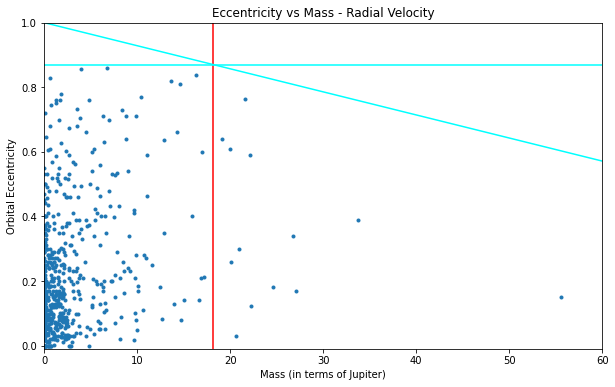

In [208]:
'''Graphing Eccentricity vs Mass for Radial Velocity-Discovered Planets'''
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,60])
plt.vlines(18.2,-0.01,1,color="red")
mass_jupiter = plt.scatter(rad_vel_table.mass_j, rad_vel_table.eccentricity,marker='.')

# sigmoid = lambda x: (0.73/(1+np.e**(x-20.5)))+0.16
# x = np.linspace(15,30,100)
# plt.plot(sigmoid(x),color='green')
# y = np.linspace(0,60,50)
# yprime = -(1/55.05)*y+1.17
# plt.plot(y,yprime,color='cyan')
# const = np.full(shape=50,fill_value=0.87)
# plt.plot(y,const,color='cyan')

x = np.linspace(0,140,50)
const = np.full(shape=50,fill_value=0.87)
slope = -(1/140)*x+1
plt.plot(x,const,color='cyan')
plt.plot(x,slope,color='cyan')

plt.title("Eccentricity vs Mass - Radial Velocity")
plt.xlabel("Mass (in terms of Jupiter)")
plt.ylabel("Orbital Eccentricity")

### Imaging Discovery Method
Constants:
- number of stars = 1
- discovery method = imaging

In [14]:
'''
Given: Discovery Method = Imaging
Generated: Eccentricity, Mass (Relative to Earth), Mass (Relative to Jupiter), Density, Distance (From Star)
'''
with open(imaging_csv,'w') as f3:
        [f3.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmasse)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].pl_dens)+","
                  +str(table.loc[i].sy_dist)+"\n")for i,line in enumerate(table.discoverymethod)if line=="Imaging"]
        
imaging_table = pd.read_csv(imaging_csv, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = imaging_table.index.stop
print(sample_size)

43


### Transit Discovery Method
Constants:
- number of stars = 1
- discovery method = transit photometry

In [15]:
'''
Given: Discovery Method = Transit
Generated: Eccentricity, Mass (Relative to Earth), Mass (Relative to Jupiter), Density, Distance (From Star)
'''
with open(transit_csv,'w') as f4:
        [f4.write(str(table.loc[i].pl_orbeccen)+","
                  +str(table.loc[i].pl_bmasse)+","
                  +str(table.loc[i].pl_bmassj)+","
                  +str(table.loc[i].pl_dens)+","
                  +str(table.loc[i].sy_dist)+"\n")for i,line in enumerate(table.discoverymethod)if line=="Transit"]
        
transit_table = pd.read_csv(transit_csv, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = transit_table.index.stop
print(sample_size)

3067


Text(0.5, 0, 'Mass (jupiter)')

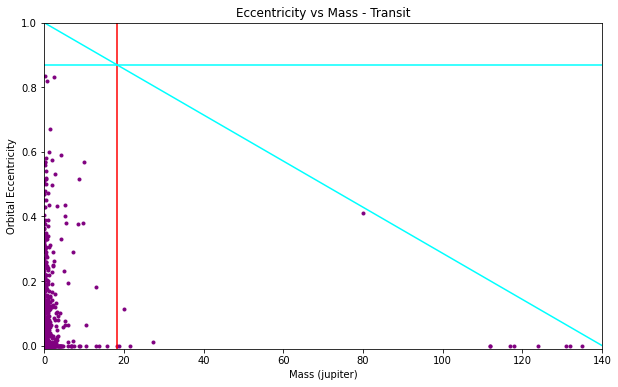

In [235]:
        '''Graphing'''
import matplotlib.pyplot as plt

'''includes outliers (all data points)'''

plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,140])
# plt.vlines(18.2,-0.01,1,color="red")
mass_jupiter = plt.scatter(transit_table.mass_j, transit_table.eccentricity, marker='.',color='purple',label="Mass")
# density = plt.scatter(transit_table.eccentricity,transit_table.density,marker='.',color='orange',label="Density")
# legend = plt.legend(handles=[mass_jupiter,density],loc='upper right')

x = np.linspace(0,140,50)
const = np.full(shape=50,fill_value=0.87)
slope = -(1/140)*x+1
plt.plot(x,const,color='cyan')
plt.plot(x,slope,color='cyan')


plt.title("Eccentricity vs Mass - Transit")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (jupiter)")

213


Text(0.5, 0, 'Mass (jupiter)')

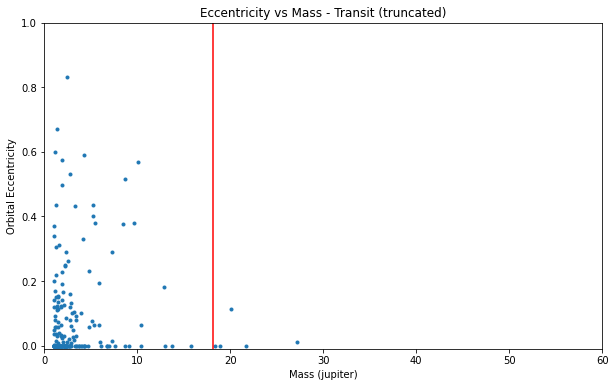

In [234]:
        '''Graphing'''
import matplotlib.pyplot as plt

'''exclude outliers to see the tightly packed distribution around'''

with open(transit_csv_condensed,'w') as f5:
                [f5.write(str(transit_table.loc[i].eccentricity)+","
                  +str(transit_table.loc[i].mass_e)+","
                  +str(transit_table.loc[i].mass_j)+","
                  +str(transit_table.loc[i].density)+","
                  +str(transit_table.loc[i].dist)+"\n")
                  for i,line in enumerate(transit_table.mass_j)if float(line)<40 and float(line)>1]
        
transit_table_condensed = pd.read_csv(transit_csv_condensed, names=['eccentricity','mass_e','mass_j','density','dist'])
sample_size = transit_table_condensed.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,60])
plt.vlines(18.2,-0.01,1,color='red')
mass_jupiter = plt.scatter(transit_table_condensed.mass_j, transit_table_condensed.eccentricity,marker='.')
plt.title("Eccentricity vs Mass - Transit (truncated)")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (jupiter)")

### Our Solar System
Constsants: 
- solar mass = 2E30 kg
- number of stars = 1
- number of planets in system = 8

9
9


Text(0, 0.5, 'Orbital Eccentricity')

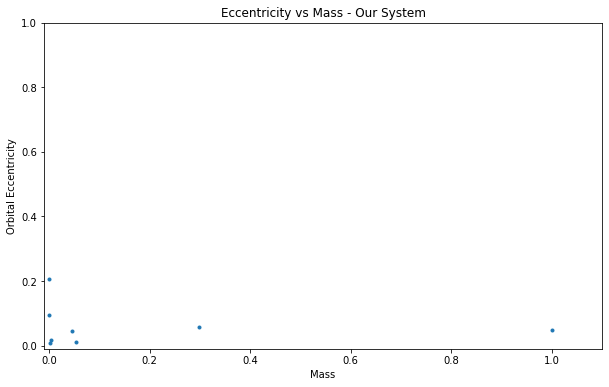

In [14]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

notebook_path = os.path.abspath("EE Graphs.ipynb")
data_extd_csv = os.path.join(os.path.dirname(notebook_path), 'Data Files\\our_system.csv')

'''formatting the csv file for pandas DataFrame'''
ctable = pd.read_csv(data_extd_csv)

'''see what the discovery method options are'''
s = set([])
for line in ctable.planet_name: s.add(line)
print(len(s))
print(len(ctable.planet_name))

# plt.scatter(ctable.eccentricity, ctable.density)
plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,1.1])
plt.scatter(ctable.mass_j, ctable.eccentricity,marker='.')
plt.title("Eccentricity vs Mass - Our System")
plt.xlabel("Mass")
plt.ylabel("Orbital Eccentricity")

### Number of Planets in System
Constants:
- number of stars = 1
- per graph: number of planets = n

1910
0.86
135.0
1
{1}


Text(1, 0.92, 'max mass = 135.0 Jupiter masses')

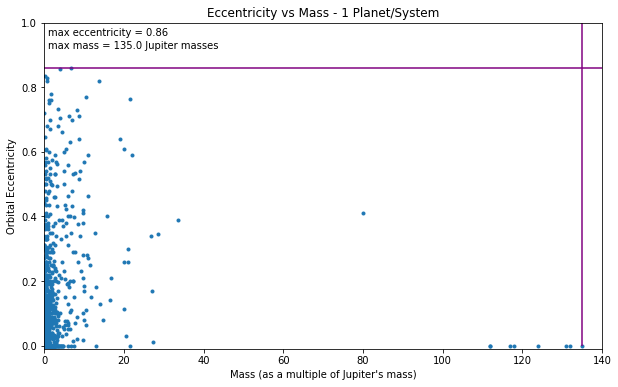

In [86]:
'''Graphing ALL planet types if they are the sole planet in their system'''
import matplotlib.pyplot as plt

# '''Generates sorted data file'''
# with open(all_csv_1,'w') as f6:
#                 [f6.write(str(table.loc[i].pl_orbeccen)+","
#                   +str(table.loc[i].pl_bmassj)+","
#                   +str(table.loc[i].sy_pnum)+"\n")
#                   for i,line in enumerate(table.sy_pnum)if float(line)==1]

'''Labels data and checks sample size'''
all_table_1 = pd.read_csv(all_csv_1, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_1.index.stop
print(sample_size)

'''Graphs lines'''
plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,140])
# plt.vlines(18.2,-0.01,1,color="red")
mass_jupiter = plt.scatter(all_table_1.mass_j, all_table_1.eccentricity,marker='.')
plt.title("Eccentricity vs Mass - 1 Planet/System")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

print(all_table_1.eccentricity.max())
print(all_table_1.mass_j.max())
print(all_table_1.sys_planet_num.max())

x = np.linspace(0,140,50)
# const = np.full(shape=50,fill_value=0.87)
# slope = -(1/140)*x+1
# plt.plot(x,const,color='cyan')
# plt.plot(x,slope,color='cyan')

sl = -(1/140)*x+1
# plt.plot(x,sl,color='cyan')

'''Adds planet with largest eccentricity to date'''
# plt.scatter(1.48,0.96,color='green')

'''Checks to make sure that filtering worked'''
s = set([])
for num in all_table_1.sys_planet_num:s.add(num)
print(s)

'''Adds max value lines'''
plt.hlines(all_table_1.eccentricity.max(), 0, 140, color='purple')
plt.vlines(all_table_1.mass_j.max(),0,1,color='purple')
plt.text(1, 0.96,r'max eccentricity = {maxy}'.format(maxy = all_table_1.eccentricity.max()))
plt.text(1, 0.92, r'max mass = {maxx} Jupiter masses'.format(maxx = all_table_1.mass_j.max()))

823
{2}
0.8369


Text(1, 0.92, 'max mass = 55.59 Jupiter masses')

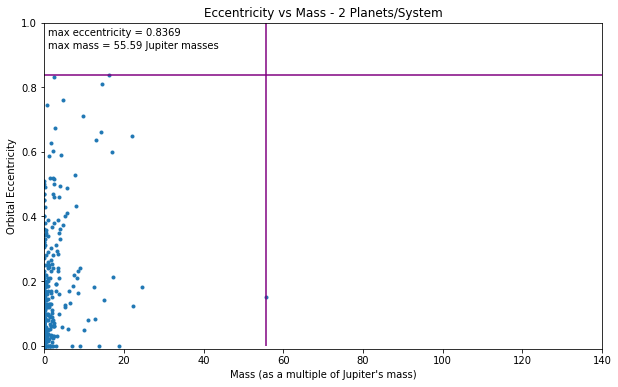

In [50]:
'''Graphing ALL planet types if they are the one of two planets in their system'''
import matplotlib.pyplot as plt

# with open(all_csv_2,'w') as f7:
#                 [f7.write(str(table.loc[i].pl_orbeccen)+","
#                   +str(table.loc[i].pl_bmassj)+","
#                   +str(table.loc[i].sy_pnum)+"\n")
#                   for i,line in enumerate(table.sy_pnum)if float(line)==2]
        
all_table_2 = pd.read_csv(all_csv_2, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_2.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,140])
# plt.vlines(18.2,-0.01,1,color="red")
mass_jupiter = plt.scatter(all_table_2.mass_j, all_table_2.eccentricity,marker='.')
plt.title("Eccentricity vs Mass - 2 Planets/System")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

# x = np.linspace(0,140,50)
# const = np.full(shape=50,fill_value=0.87)
# slope = -(1/140)*x+1
# plt.plot(x,const,color='cyan')
# plt.plot(x,slope,color='cyan')

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_2.sys_planet_num:s.add(num)
print(s)
print(all_table_2.eccentricity.max())

'''Adds max value lines'''
plt.hlines(all_table_2.eccentricity.max(), 0, 140, color='purple')
plt.vlines(all_table_2.mass_j.max(),0,1,color='purple')
plt.text(1, 0.96,r'max eccentricity = {maxy}'.format(maxy = all_table_2.eccentricity.max()))
plt.text(1, 0.92, r'max mass = {maxx} Jupiter masses'.format(maxx = all_table_2.mass_j.max()))

385
{3}
0.55


Text(1, 0.92, 'max mass = 18.41 Jupiter masses')

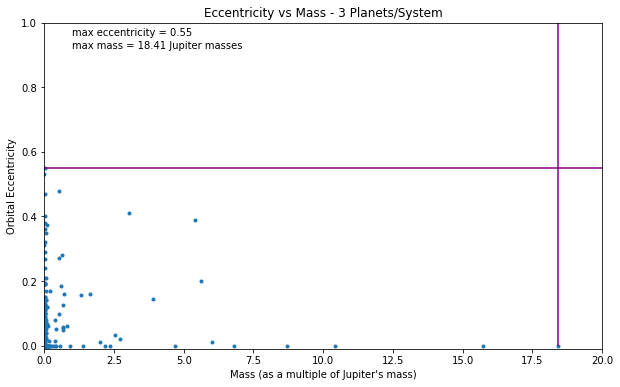

In [53]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

# with open(all_csv_3,'w') as f8:
#                 [f8.write(str(table.loc[i].pl_orbeccen)+","
#                   +str(table.loc[i].pl_bmassj)+","
#                   +str(table.loc[i].sy_pnum)+"\n")
#                   for i,line in enumerate(table.sy_pnum)if float(line)==3]
        
all_table_3 = pd.read_csv(all_csv_3, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_3.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,20])
# plt.vlines(18.2,-0.01,1,color="red")
mass_jupiter = plt.scatter(all_table_3.mass_j, all_table_3.eccentricity,marker='.')
plt.title("Eccentricity vs Mass - 3 Planets/System")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

# x = np.linspace(0,140,50)
# const = np.full(shape=50,fill_value=0.87)
# slope = -(1/140)*x+1
# plt.plot(x,const,color='cyan')
# plt.plot(x,slope,color='cyan')

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_3.sys_planet_num:s.add(num)
print(s)
print(all_table_3.eccentricity.max())

'''Adds max value lines'''
plt.hlines(all_table_3.eccentricity.max(), 0, 140, color='purple')
plt.vlines(all_table_3.mass_j.max(),0,1,color='purple')
plt.text(1, 0.96,r'max eccentricity = {maxy}'.format(maxy = all_table_3.eccentricity.max()))
plt.text(1, 0.92, r'max mass = {maxx} Jupiter masses'.format(maxx = all_table_3.mass_j.max()))

194
{4}
0.6


Text(1, 0.92, 'max mass = 10.0 Jupiter masses')

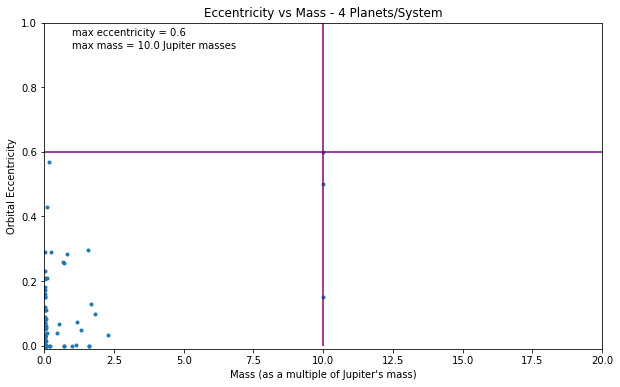

In [54]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

# with open(all_csv_4,'w') as f9:
#                 [f9.write(str(table.loc[i].pl_orbeccen)+","
#                   +str(table.loc[i].pl_bmassj)+","
#                   +str(table.loc[i].sy_pnum)+"\n")
#                   for i,line in enumerate(table.sy_pnum)if float(line)==4]
        
all_table_4 = pd.read_csv(all_csv_4, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_4.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,20])
# plt.vlines(18.2,-0.01,1,color="red")
mass_jupiter = plt.scatter(all_table_4.mass_j, all_table_4.eccentricity,marker='.')
plt.title("Eccentricity vs Mass - 4 Planets/System")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_4.sys_planet_num:s.add(num)
print(s)
print(all_table_4.eccentricity.max())

'''Adds max value lines'''
plt.hlines(all_table_4.eccentricity.max(), 0, 140, color='purple')
plt.vlines(all_table_4.mass_j.max(),0,1,color='purple')
plt.text(1, 0.96,r'max eccentricity = {maxy}'.format(maxy = all_table_4.eccentricity.max()))
plt.text(1, 0.92, r'max mass = {maxx} Jupiter masses'.format(maxx = all_table_4.mass_j.max()))

89
{5}
0.403


Text(0, 0.92, 'max mass = 4.1 Jupiter masses')

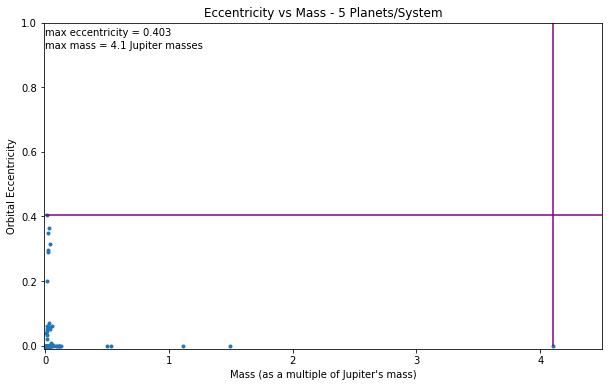

In [40]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

# with open(all_csv_5,'w') as f10:
#                 [f10.write(str(table.loc[i].pl_orbeccen)+","
#                   +str(table.loc[i].pl_bmassj)+","
#                   +str(table.loc[i].sy_pnum)+"\n")
#                   for i,line in enumerate(table.sy_pnum)if float(line)==5]
        
all_table_5 = pd.read_csv(all_csv_5, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_5.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,4.5])
mass_jupiter = plt.scatter(all_table_5.mass_j, all_table_5.eccentricity,marker='.')
plt.title("Eccentricity vs Mass - 5 Planets/System")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_5.sys_planet_num:s.add(num)
print(s)
print(all_table_5.eccentricity.max())

'''Adds max value lines'''
plt.hlines(all_table_5.eccentricity.max(), 0, 140, color='purple')
plt.vlines(all_table_5.mass_j.max(),0,1,color='purple')
plt.text(0, 0.96,r'max eccentricity = {maxy}'.format(maxy = all_table_5.eccentricity.max()))
plt.text(0, 0.92, r'max mass = {maxx} Jupiter masses'.format(maxx = all_table_5.mass_j.max()))

29
{6}
0.27


Text(0, 0.92, 'max mass = 0.82 Jupiter masses')

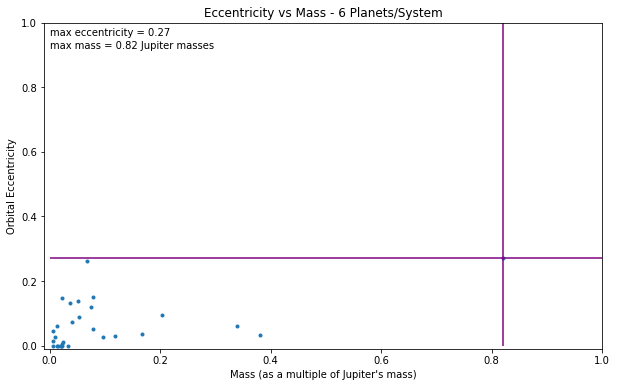

In [39]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

# with open(all_csv_6,'w') as f11:
#                 [f11.write(str(table.loc[i].pl_orbeccen)+","
#                   +str(table.loc[i].pl_bmassj)+","
#                   +str(table.loc[i].sy_pnum)+"\n")
#                   for i,line in enumerate(table.sy_pnum)if float(line)==6]
        
all_table_6 = pd.read_csv(all_csv_6, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_6.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,1])
mass_jupiter = plt.scatter(all_table_6.mass_j, all_table_6.eccentricity,marker='.')
plt.title("Eccentricity vs Mass - 6 Planets/System")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_6.sys_planet_num:s.add(num)
print(s)
print(all_table_6.eccentricity.max())

'''Adds max value lines'''
plt.hlines(all_table_6.eccentricity.max(), 0, 140, color='purple')
plt.vlines(all_table_6.mass_j.max(),0,1,color='purple')
plt.text(0, 0.96,r'max eccentricity = {maxy}'.format(maxy = all_table_6.eccentricity.max()))
plt.text(0, 0.92, r'max mass = {maxx} Jupiter masses'.format(maxx = all_table_6.mass_j.max()))

7
{7}
0.085


Text(0, 0.92, 'max mass = 0.00434 Jupiter masses')

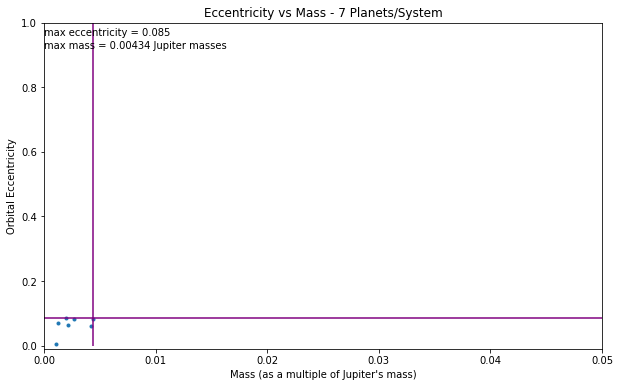

In [41]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

# with open(all_csv_7,'w') as f12:
#                 [f12.write(str(table.loc[i].pl_orbeccen)+","
#                   +str(table.loc[i].pl_bmassj)+","
#                   +str(table.loc[i].sy_pnum)+"\n")
#                   for i,line in enumerate(table.sy_pnum)if float(line)==7]
        
all_table_7 = pd.read_csv(all_csv_7, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_7.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([0,0.05])
mass_jupiter = plt.scatter(all_table_7.mass_j, all_table_7.eccentricity,marker='.')
plt.title("Eccentricity vs Mass - 7 Planets/System")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

'''Check to make sure that filtering worked'''
s = set([])
for num in all_table_7.sys_planet_num:s.add(num)
print(s)
print(all_table_7.eccentricity.max())

'''Adds max value lines'''
plt.hlines(all_table_7.eccentricity.max(), 0, 140, color='purple')
plt.vlines(all_table_7.mass_j.max(),0,1,color='purple')
plt.text(0, 0.96,r'max eccentricity = {maxy}'.format(maxy = all_table_7.eccentricity.max()))
plt.text(0, 0.92, r'max mass = {maxx} Jupiter masses'.format(maxx = all_table_7.mass_j.max()))

7
{8}
0.205


Text(0, 0.92, 'max mass = 1.2 Jupiter masses')

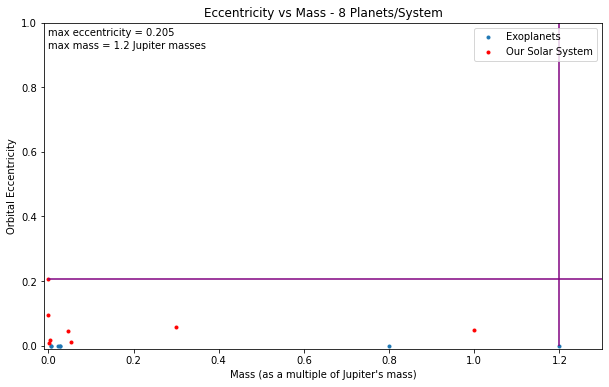

In [44]:
'''Graphing ALL planet types if they are the one of three planets in their system'''
import matplotlib.pyplot as plt

# with open(all_csv_8,'w') as f13:
#                 [f13.write(str(table.loc[i].pl_orbeccen)+","
#                   +str(table.loc[i].pl_bmassj)+","
#                   +str(table.loc[i].sy_pnum)+"\n")
#                   for i,line in enumerate(table.sy_pnum)if float(line)==8]
        
all_table_8 = pd.read_csv(all_csv_8, names=['eccentricity','mass_j', 'sys_planet_num'])
sample_size = all_table_8.index.stop
print(sample_size)

plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,1.3])
mass_jupiter = plt.scatter(all_table_8.mass_j, all_table_8.eccentricity,marker='.', label='Exoplanets')
our_sys = plt.scatter(ctable.mass_j, ctable.eccentricity,marker='.', color='red',label='Our Solar System')
plt.title("Eccentricity vs Mass - 8 Planets/System")
plt.ylabel("Orbital Eccentricity")
plt.xlabel("Mass (as a multiple of Jupiter's mass)")

plt.legend(handles=[mass_jupiter,our_sys],loc='upper right')

'''Check to make sure that filtering worked and all planets are the sole members of their planetary system'''
s = set([])
for num in all_table_8.sys_planet_num:s.add(num)
print(s)
print(ctable.eccentricity.max())

'''Adds max value lines'''
plt.hlines(ctable.eccentricity.max(), 0, 140, color='purple')
plt.vlines(all_table_8.mass_j.max(),0,1,color='purple')
plt.text(0, 0.96,r'max eccentricity = {maxy}'.format(maxy = ctable.eccentricity.max()))
plt.text(0, 0.92, r'max mass = {maxx} Jupiter masses'.format(maxx = all_table_8.mass_j.max()))

Text(0.5, 1.0, 'Eccentricity vs Mass - Sorted by Planet Number')

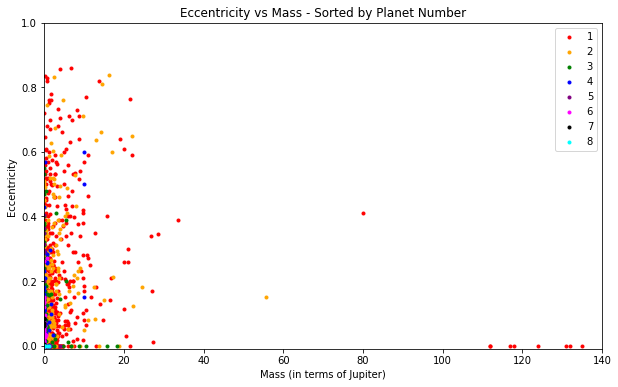

In [55]:
'''Combined All 'ALL' graphs: layered'''
plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,140])
# plt.vlines(18.2,-0.01,1,color="black")
a = plt.scatter(all_table_1.mass_j, all_table_1.eccentricity, marker='.', color='red', label='1')
b = plt.scatter(all_table_2.mass_j, all_table_2.eccentricity, marker='.', color='orange',label='2')
c = plt.scatter(all_table_3.mass_j, all_table_3.eccentricity, marker='.', color='green',label='3')
d = plt.scatter(all_table_4.mass_j, all_table_4.eccentricity, marker='.', color='blue',label='4')
e = plt.scatter(all_table_5.mass_j, all_table_5.eccentricity, marker='.', color='purple',label='5')
f = plt.scatter(all_table_6.mass_j, all_table_6.eccentricity, marker='.', color='magenta',label='6')
g = plt.scatter(all_table_7.mass_j, all_table_7.eccentricity, marker='.', color='black',label='7')
h = plt.scatter(all_table_8.mass_j, all_table_8.eccentricity, marker='.', color='cyan',label='8')

legend = plt.legend(handles=[a,b,c,d,e,f,g,h],loc='upper right')
plt.xlabel('Mass (in terms of Jupiter)')
plt.ylabel('Eccentricity')
plt.title('Eccentricity vs Mass - Sorted by Planet Number')

### All Planets
Constants:
- number of stars = 1

1075


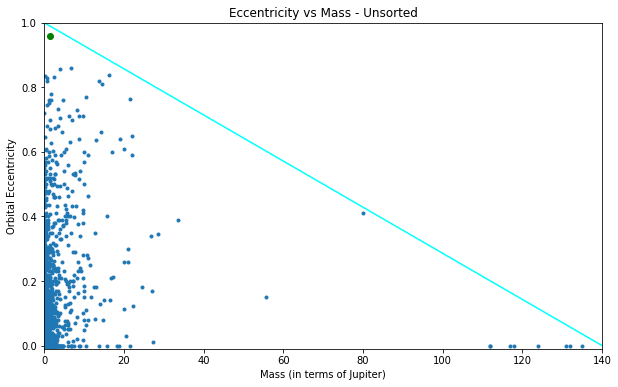

In [87]:
'''ALL PLANETS'''
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.ylim([-0.01,1])
plt.xlim([-0.01,140])
# plt.vlines(18.2,-0.01,1,color="red")
fig = plt.scatter(table.pl_bmassj, table.pl_orbeccen, marker='.')
plt.title("Eccentricity vs Mass - Unsorted")
plt.xlabel("Mass (in terms of Jupiter)")
plt.ylabel("Orbital Eccentricity")

'''Sample Size'''
a=0
for i,num in enumerate(table.pl_bmassj):
    if table.loc[i].pl_orbeccen:
        a+=1   
print(a)

'''Adds max value lines'''
# plt.hlines(table.pl_orbeccen.max(), 0, 140, color='purple')
# plt.vlines(table.pl_bmassj.max(),0,1,color='purple')
# plt.text(1, 0.96,r'max eccentricity = {maxy}'.format(maxy = table.pl_orbeccen.max()))
# plt.text(1, 0.92, r'max mass = {maxx} Jupiter masses'.format(maxx = table.pl_bmassj.max()))

x = np.linspace(0,140,50)
slope = -(1/140)*x+1
plt.plot(x,slope,color='cyan')

'''Adds planet with largest eccentricity to date'''
plt.scatter(1.48,0.96,color='green')

### Angular Momentum Calculations
Constants:
- number of stars = 1


Text(0.5, 1.0, 'Maximum Eccentricity for Each Number of Planets in a System')

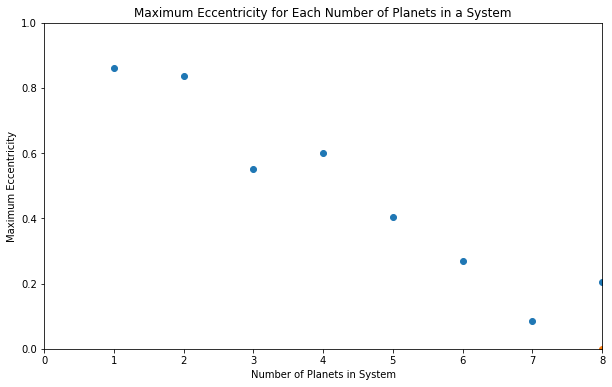

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.ylim([0,1])
plt.xlim([0,8])
plt.scatter([1,2,3,4,5,6,7,8],[0.86,0.8369,0.55,0.6,0.403,0.27,0.085,0.205])
plt.scatter([8],[0])
x = np.linspace(0.1,8,1000)
y = (-1/15)*x+1
# plt.scatter(x, y, color='black', marker='.')
plt.xlabel('Number of Planets in System')
plt.ylabel('Maximum Eccentricity')
plt.title('Maximum Eccentricity for Each Number of Planets in a System')